# OCR Label Detection

## Setup

In [2]:
import image_str
from matplotlib import pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'image_str'

## Set Image Path

In [3]:
image_path = 'data/images/ISS.jpg'

## Set Result Folder

The result folder is where the result image with the boundary boxes and text displayed will be saved. If no result folder is provided, the image will not be saved to a file.

In [7]:
result_folder = 'results/' 

## Get Label Database and Image

Given an image path, result_folder, and path to trained craft model, the decode_image function will return a database (database), a dictionary (locations) and two array images (result_image and image). 

database - a pandas database with columns 'location' and 'label' with all the labels in the given image.

locations - a dictionary where the keys are the labels and the values are the (x, y, z, row, pitch, yaw).

result_image - an array image with all the labels marked.

image - an array image of the original image.

In [1]:
database = pd.DataFrame(columns=["label", "location"])
database, result_image, image, locations, set_locations = image_str.parse_img.decode_image(image_path, database, result_folder=None, trained_model='data/models/craft_mlt_25k.pth')

NameError: name 'pd' is not defined

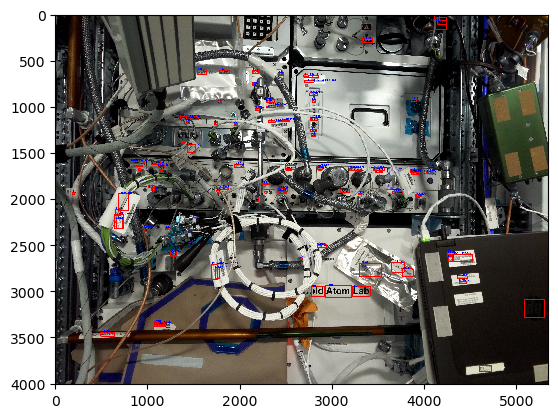

In [5]:
plt.imshow(result_image)

## Find Specific Label

In [9]:
label = 'Laptop'
new_image, images = parser.find(image, database, label)

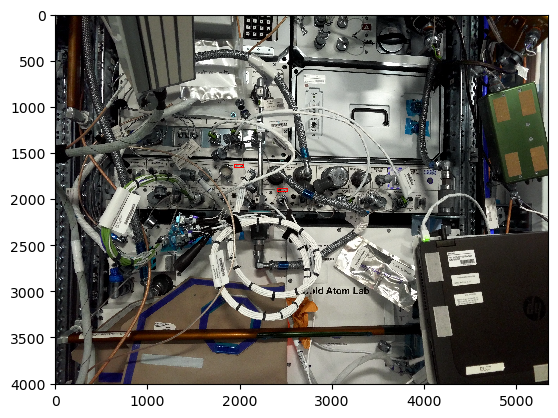

In [10]:
plt.imshow(new_image)

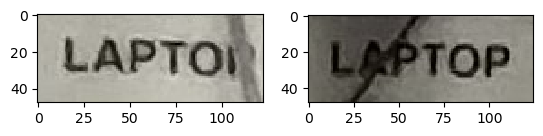

In [11]:
parser.display_images(images)